# Agenda

PART I - Data Set up

1) Import Data.
2) Seperate hours from date.
3) Test Data.
4) Merge both csv.

PART II - Answering Questions

1) Question 1 : Top 36 hrs. most undersupplied.
2) Question 2 : Avg. demand-supply curve per day.
3) Question 3 : Visualization demand -supply.
4) Question 4 : Estimate required Hrs for a High Coverage ratio.
5) Question 5 : Calculate guaranteed hourly earnings


## Import Data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
import seaborn as sns


In [2]:
supply = pd.read_csv("Hourly_DriverActivity_1.csv - Hourly_DriverActivity_1.csv.csv", low_memory=False)
demand = pd.read_csv("Hourly_OverviewSearch_1.csv - Hourly_OverviewSearch_1.csv.csv", low_memory=False)

In [3]:
supply.head(3)

Date  Active drivers  Online (h)  Has booking (h)  \
0  2016-12-18 23              52          18                6   
1  2016-12-18 22              59          20               11   
2  2016-12-18 21              72          25                7   

   Waiting for booking (h)  Busy (h)  Hours per active driver  \
0                       11        11                      0.3   
1                        9        12                      0.3   
2                       18        15                      0.3   

   Rides per online hour  Finished Rides  
0                   0.67            12.0  
1                   1.40            28.0  
2                   0.64            16.0

In [4]:
demand.head(3)

Date  People saw 0 cars (unique)  People saw +1 cars (unique)  \
0  2016-12-18 23                           9                           32   
1  2016-12-18 22                          29                           64   
2  2016-12-18 21                           5                           39   

   Coverage Ratio (unique)  
0                       78  
1                       69  
2                       89

## 2) Seperating Hours from date

In [5]:
#same for Demand
demand["Dates"] = demand["Date"].str.split(" ").str[0]
demand["Hour"] = demand["Date"].str.split(" ").str[1]

#same for supply
supply["Dates"] = supply["Date"].str.split(" ").str[0]
supply["Hour"] = supply["Date"].str.split(" ").str[1]

In [6]:
#visualy
supply.head(3)

Date  Active drivers  Online (h)  Has booking (h)  \
0  2016-12-18 23              52          18                6   
1  2016-12-18 22              59          20               11   
2  2016-12-18 21              72          25                7   

   Waiting for booking (h)  Busy (h)  Hours per active driver  \
0                       11        11                      0.3   
1                        9        12                      0.3   
2                       18        15                      0.3   

   Rides per online hour  Finished Rides       Dates Hour  
0                   0.67            12.0  2016-12-18   23  
1                   1.40            28.0  2016-12-18   22  
2                   0.64            16.0  2016-12-18   21

In [7]:
demand.head(3)

Date  People saw 0 cars (unique)  People saw +1 cars (unique)  \
0  2016-12-18 23                           9                           32   
1  2016-12-18 22                          29                           64   
2  2016-12-18 21                           5                           39   

   Coverage Ratio (unique)       Dates Hour  
0                       78  2016-12-18   23  
1                       69  2016-12-18   22  
2                       89  2016-12-18   21

## 3) Test Data

In [8]:
#check missing/null/distinct values
missing = pd.DataFrame( data = [ demand.nunique(),demand.notnull().sum() , demand.isna().sum() , ((demand.isna().sum()/ demand.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

unique values  not null values  missing values  \
Date                                 839.0            839.0             0.0   
People saw 0 cars (unique)            74.0            839.0             0.0   
People saw +1 cars (unique)          106.0            839.0             0.0   
Coverage Ratio (unique)               77.0            839.0             0.0   
Dates                                 35.0            839.0             0.0   
Hour                                  24.0            839.0             0.0   

                             percentage  
Date                                0.0  
People saw 0 cars (unique)          0.0  
People saw +1 cars (unique)         0.0  
Coverage Ratio (unique)             0.0  
Dates                               0.0  
Hour                                0.0

In [9]:
#check missing/null/distinct values
missing = pd.DataFrame( data = [ supply.nunique(),supply.notnull().sum() , supply.isna().sum() , ((supply.isna().sum()/ supply.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

unique values  not null values  missing values  \
Date                             840.0            840.0             0.0   
Active drivers                   113.0            840.0             0.0   
Online (h)                        53.0            840.0             0.0   
Has booking (h)                   29.0            840.0             0.0   
Waiting for booking (h)           46.0            840.0             0.0   
Busy (h)                          36.0            840.0             0.0   
Hours per active driver            6.0            840.0             0.0   
Rides per online hour            154.0            840.0             0.0   
Finished Rides                    56.0            795.0            45.0   
Dates                             35.0            840.0             0.0   
Hour                              24.0            840.0             0.0   

                         percentage  
Date                       0.000000  
Active drivers             0.000000  
Online (h)                 0.000000  
Has booking (h)            0.000000  
Waiting for booking (h)    0.000000  
Busy (h)                   0.000000  
Hours per active driver    0.000000  
Rides per online hour      0.000000  
Finished Rides             5.660377  
Dates                      0.000000  
Hour                       0.000000

### There are some missing values on Finished Rides, Dates and hour. So ... lets check

In [10]:
supply["Finished Rides"].describe()

count    795.000000
mean      14.764780
std       11.362529
min        1.000000
25%        6.000000
50%       12.000000
75%       20.000000
max       62.000000
Name: Finished Rides, dtype: float64

>The minimum number is 1 thus we will assume that the missing values are simply Zero.

## Fixing missing values

In [11]:
#ignore the warnigns
import warnings
warnings.filterwarnings('ignore')

supply["Finished Rides"][supply["Finished Rides"].isna()] = 0
supply["Finished Rides"].describe()

count    840.000000
mean      13.973810
std       11.543328
min        0.000000
25%        5.000000
50%       11.000000
75%       20.000000
max       62.000000
Name: Finished Rides, dtype: float64

## 4) Merge

In [12]:
df = pd.merge(supply,demand,how='outer',on=['Dates','Hour'])
df.head()

Date_x  Active drivers  Online (h)  Has booking (h)  \
0  2016-12-18 23              52          18                6   
1  2016-12-18 22              59          20               11   
2  2016-12-18 21              72          25                7   
3  2016-12-18 20              86          29                7   
4  2016-12-18 19              82          31               14   

   Waiting for booking (h)  Busy (h)  Hours per active driver  \
0                       11        11                      0.3   
1                        9        12                      0.3   
2                       18        15                      0.3   
3                       23        15                      0.3   
4                       17        19                      0.4   

   Rides per online hour  Finished Rides       Dates Hour         Date_y  \
0                   0.67            12.0  2016-12-18   23  2016-12-18 23   
1                   1.40            28.0  2016-12-18   22  2016-12-18 22   
2                   0.64            16.0  2016-12-18   21  2016-12-18 21   
3                   0.52            15.0  2016-12-18   20  2016-12-18 20   
4                   1.16            36.0  2016-12-18   19  2016-12-18 19   

   People saw 0 cars (unique)  People saw +1 cars (unique)  \
0                         9.0                         32.0   
1                        29.0                         64.0   
2                         5.0                         39.0   
3                        13.0                         48.0   
4                        12.0                         77.0   

   Coverage Ratio (unique)  
0                     78.0  
1                     69.0  
2                     89.0  
3                     79.0  
4                     87.0

In [13]:
#check missing/null/distinct values
missing = pd.DataFrame( data = [ df.nunique(),df.notnull().sum() , df.isna().sum() , ((df.isna().sum()/ df.count())*100)])
missing.index=[ "unique values","not null values","missing values", "percentage"]
missing.transpose()

unique values  not null values  missing values  \
Date_x                               840.0            840.0             0.0   
Active drivers                       113.0            840.0             0.0   
Online (h)                            53.0            840.0             0.0   
Has booking (h)                       29.0            840.0             0.0   
Waiting for booking (h)               46.0            840.0             0.0   
Busy (h)                              36.0            840.0             0.0   
Hours per active driver                6.0            840.0             0.0   
Rides per online hour                154.0            840.0             0.0   
Finished Rides                        57.0            840.0             0.0   
Dates                                 35.0            840.0             0.0   
Hour                                  24.0            840.0             0.0   
Date_y                               839.0            839.0             1.0   
People saw 0 cars (unique)            74.0            839.0             1.0   
People saw +1 cars (unique)          106.0            839.0             1.0   
Coverage Ratio (unique)               77.0            839.0             1.0   

                             percentage  
Date_x                          0.00000  
Active drivers                  0.00000  
Online (h)                      0.00000  
Has booking (h)                 0.00000  
Waiting for booking (h)         0.00000  
Busy (h)                        0.00000  
Hours per active driver         0.00000  
Rides per online hour           0.00000  
Finished Rides                  0.00000  
Dates                           0.00000  
Hour                            0.00000  
Date_y                          0.11919  
People saw 0 cars (unique)      0.11919  
People saw +1 cars (unique)     0.11919  
Coverage Ratio (unique)         0.11919

> Seems like there is 1 missing date on the right side that is missing. This makes sense since the data on supply had 840 and demand had 839 lines

The missing value is due to zero values in all the demand row thus we need to put "0" to all of them

In [14]:
df[df["Date_y"].isna()]

Date_x  Active drivers  Online (h)  Has booking (h)  \
282  2016-12-07 05              24           8                0   

     Waiting for booking (h)  Busy (h)  Hours per active driver  \
282                        8        10                      0.3   

     Rides per online hour  Finished Rides       Dates Hour Date_y  \
282                    0.0             0.0  2016-12-07   05    NaN   

     People saw 0 cars (unique)  People saw +1 cars (unique)  \
282                         NaN                          NaN   

     Coverage Ratio (unique)  
282                      NaN

In [15]:
#assigning 0 to all missing values.
df["People saw 0 cars (unique)"][df["People saw 0 cars (unique)"].isna()] = 0
df["People saw +1 cars (unique)"][df["People saw +1 cars (unique)"].isna()] = 0
df["Coverage Ratio (unique)"][df["Coverage Ratio (unique)"].isna()] = 0

In [16]:
df[df["Date_y"].isna()]

Date_x  Active drivers  Online (h)  Has booking (h)  \
282  2016-12-07 05              24           8                0   

     Waiting for booking (h)  Busy (h)  Hours per active driver  \
282                        8        10                      0.3   

     Rides per online hour  Finished Rides       Dates Hour Date_y  \
282                    0.0             0.0  2016-12-07   05    NaN   

     People saw 0 cars (unique)  People saw +1 cars (unique)  \
282                         0.0                          0.0   

     Coverage Ratio (unique)  
282                      0.0

> ###  Fixed! Now we are ready to start!


---
---
# PART II


## *_Answering Questions_*





---
---

### 1.	Show which 36 hours in a week are most undersupplied. Show/describe your decision based on sample data.

There are 2 ways to see this:
    
    1) The Volume of undersupplied people.
    2) The proportion of undersuppliment (coverage Ratio).
 

By all means the first option (volume) is the most important, here is why:

    1) User perception:        The user expects to be served and he/she doesnt have an idea of the demand/supply peak hours.
    2) Loss of market share:   For each user underservice this means our rival gains an user.  
    3) Loss of user trust:     The more '0 car views' the less trust on our side, if the app becomes labeled as 'unreliable service' we loose users that comeback to reuse the service. 
    4) Volume is not relative: The proportion is relative to the total. Thus, the importance of the proportion is subjective to the total amount, making it a biased number.

From our data we easily have this by looking at the 'People saw 0 cars' column.


In [17]:
question1 = df[["Date_x","People saw 0 cars (unique)"]]
question1 = question1.sort_values(by='People saw 0 cars (unique)', ascending=False)
question1 = question1.head(36)
question1.head(5)

Date_x  People saw 0 cars (unique)
52  2016-12-16 19                       129.0
77  2016-12-15 18                       124.0
43  2016-12-17 04                       106.0
76  2016-12-15 19                       105.0
44  2016-12-17 03                       105.0

Lets Illustrate the solution

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 <a list of 36 Text major ticklabel objects>)

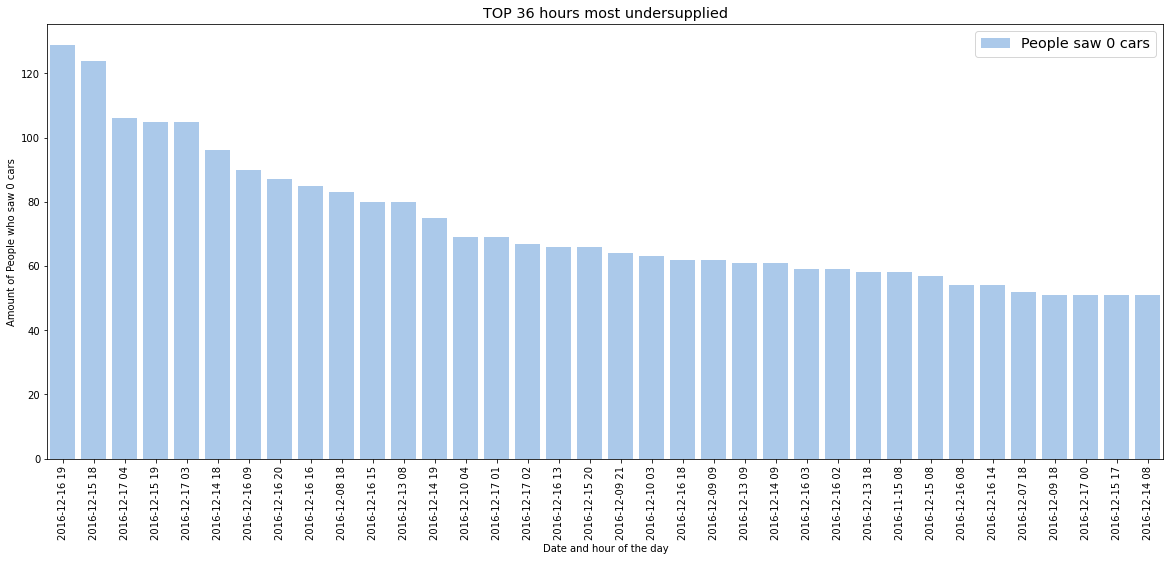

In [18]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20,8))

# Plot the data 
sns.set_color_codes("pastel")
sns.barplot(x="Date_x", y="People saw 0 cars (unique)", data=question1.head(36),
            label="People saw 0 cars", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="top right", frameon=True, fontsize="x-large" )
ax.set( ylabel="Amount of People who saw 0 cars", xlabel="Date and hour of the day")
ax.set_title('TOP 36 hours most undersupplied',fontsize="x-large")

# Rotate the x axis for better read
plt.xticks(rotation=90, fontsize='medium')

### 2.	24-hour curve of average supply and demand (to illustrate match/mismatch).

The demand is equal to the 'satisfied' + 'unsatisfied' demad. 

Thus:

> $\text{Total_demand} = \text{People saw >=1 cars}+ \text{People saw 0 cars}$

The Supply is equal to the 'performed supply' + 'available but not used supply'

Thus:

> $\text{Total_supply} = \text{Finished Rides}+( \text{Online (h)} * \text{Rides per online hour})$


*NB: Please note the following graph is meant for users with some knowledge on statistics.*

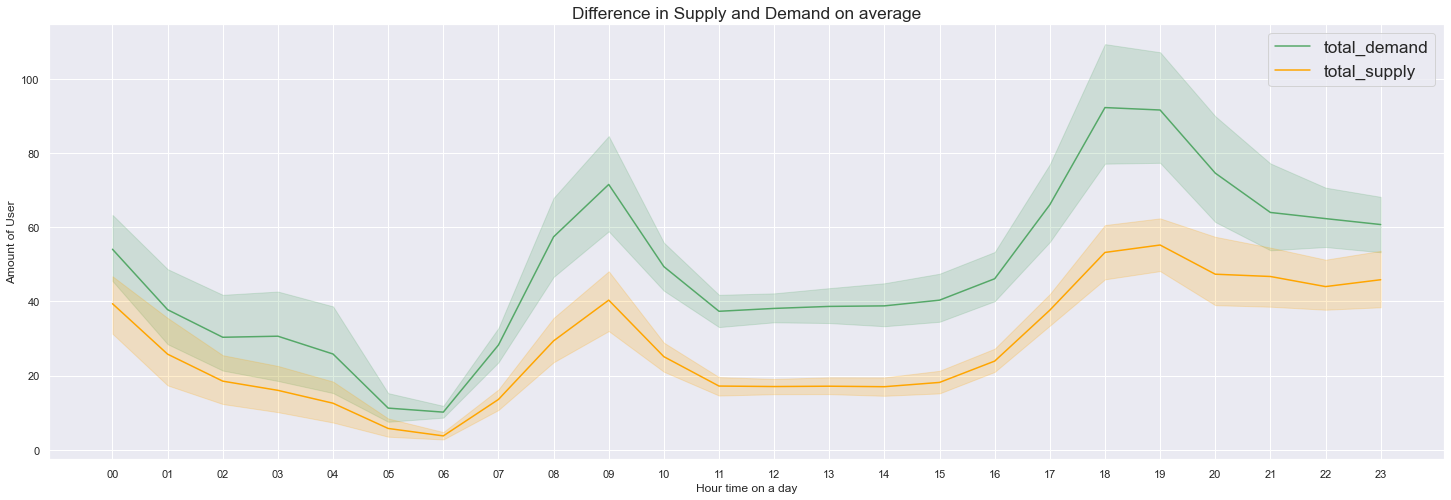

In [19]:
# Get the Data
question2 = df[["Date_x","People saw +1 cars (unique)","People saw 0 cars (unique)","Finished Rides","Rides per online hour","Online (h)"]]
question2['total_demand'] = question2["People saw +1 cars (unique)"] + question2["People saw 0 cars (unique)"]
question2['total_supply'] = question2["Finished Rides"] + (question2["Online (h)"]*question2["Rides per online hour"])
question2['Hour'] = question2["Date_x"].str[-2:]
question2 = question2[['Hour','total_demand','total_supply']]
#question2 = question2.groupby('Hour',dropna=False).mean()
question2 = question2.sort_values(by='Hour', ascending=True)

sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(25,8))

# Add a legend and informative axis label

ax.set( ylabel="Amount of User", xlabel="Hour time on a day")
ax.set_title('Difference in Supply and Demand on average',fontsize="x-large")
 
# Plot the responses for different events and regions
sns.lineplot(x="Hour", y="total_demand", color='g',
             data=question2, label= 'total_demand')
sns.lineplot(x="Hour", y="total_supply", color='orange',
             data=question2, label='total_supply')

ax.legend(ncol=1, loc="top left", frameon=True, fontsize="x-large" )


### 3.	Visualisation of hours where we lack supply during a weekly period

Since the user of this visualization is likely to lack statistical knowledge, the following graph is made to be simple and likely to be retained.

In [20]:
# Get the Data
question3 = df[["Date_x","People saw +1 cars (unique)","People saw 0 cars (unique)","Finished Rides","Rides per online hour","Waiting for booking (h)"]]
question3['total_demand'] = question3["People saw +1 cars (unique)"] + question3["People saw 0 cars (unique)"]
question3['total_supply'] = question3["Finished Rides"] + (question3["Waiting for booking (h)"]*question3["Rides per online hour"])
question3['UnderSupply'] = question3['total_demand'] - question3['total_supply']
question3['Hour'] = question3["Date_x"].str[-2:]
question3 = question3[['Hour','UnderSupply']]
question3 = question3.groupby(by='Hour',as_index=False,dropna=False).mean()
question3 = question3.sort_values(by='Hour', ascending=True)
question3['Hour_ampm'] = question3["Hour"].apply(lambda x:  str(int(x)-12)+" pm" if int(x) > 12  else  str(x)+" am" )

Text(0.5, 1.0, 'Best time to go out')

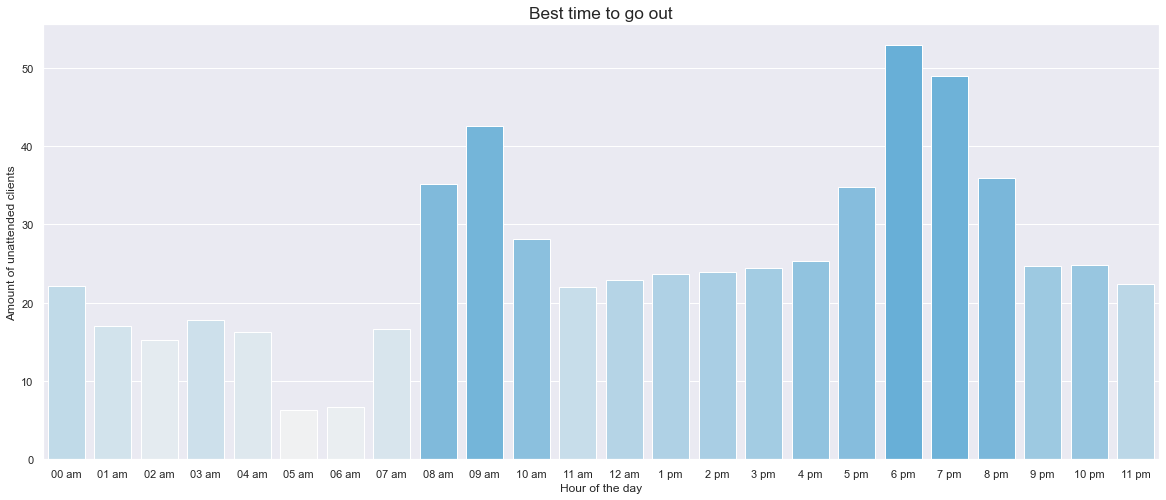

In [21]:

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20,8))

# Plot the data 
sns.set_color_codes("colorblind")

# create color ladder
colors_ladder = sns.color_palette("light:c", len(question3['UnderSupply']))
key_values = question3['UnderSupply'].sort_values(ascending=True).tolist()
dictionary = dict(zip(key_values, colors_ladder))
question3['colors'] = question3["UnderSupply"].apply(lambda x: dictionary[x])

#create bars
sns.barplot(x="Hour_ampm", y="UnderSupply", data=question3,
            label="UnderSupply",palette=question3['colors']) 
# Add a legend and informative axis label
ax.set( ylabel="Amount of unattended clients", xlabel="Hour of the day")
ax.set_title('Best time to go out',fontsize="x-large")
  

### 4.	Estimate number of hours needed to ensure we have a high Coverage Ratio during most peak hours

To do:
> Do all hours have the same coverage ratio? 

> What is considered a "high" coverage ratio ?

> How do we translate the needed increase in coverage ratio to Online hours?  

The following graph shows the distribution of the coverage ratio per hour:

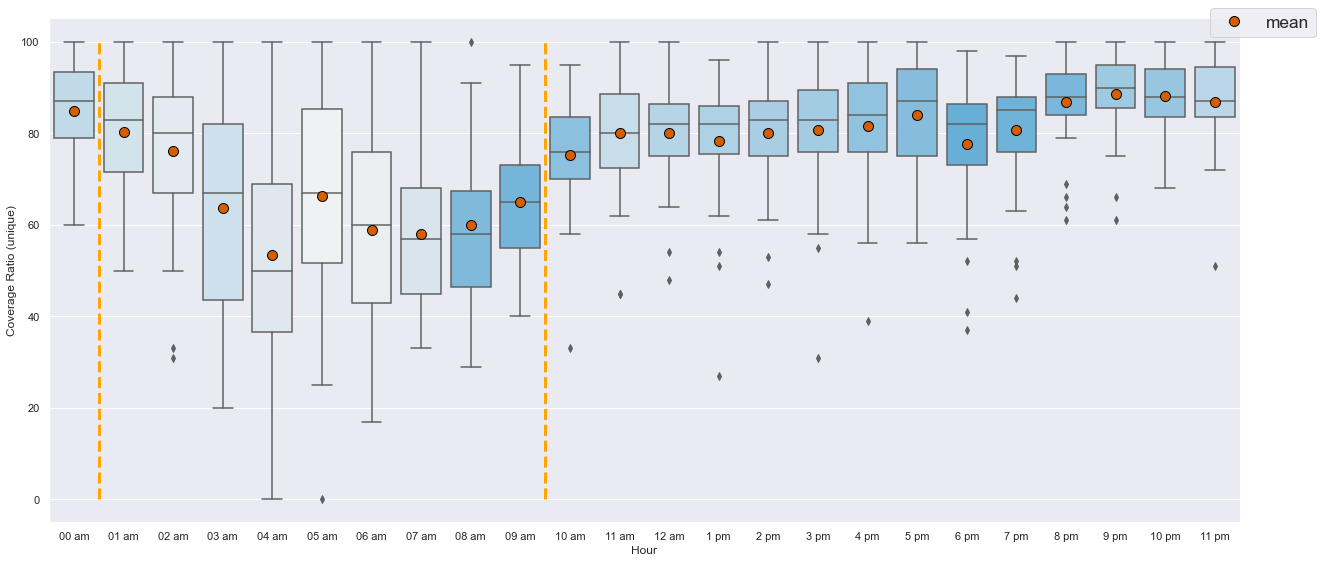

In [52]:
#average cover ratio per hour:
question4 = demand[['People saw 0 cars (unique)', 'People saw +1 cars (unique)','Coverage Ratio (unique)',  'Hour']]
question4 = question4.sort_values(by ='Hour')
question4['Hour'] = question4["Hour"].apply(lambda x:  str(int(x)-12)+" pm" if int(x) > 12  else  str(x)+" am" )

# Plot
g = sns.catplot(x = 'Hour' , y = 'Coverage Ratio (unique)',   kind="box", data=question4[['Hour','Coverage Ratio (unique)']], palette=question3['colors'],
                showmeans=True)

# Set size
g.fig.set_size_inches(20,8)

# Add line
plt.plot([9.5,9.5], [ 0,100], linewidth=3, ls= '--', color='orange' )
plt.plot([0.5,0.5], [ 0,100], linewidth=3, ls= '--', color='orange' )


marker = mlines.Line2D([], [],marker="o",markerfacecolor="r",
                          markeredgecolor="black", markersize="10",
                          label='mean', linewidth=0)
g.fig.legend(handles=[marker],loc="best", frameon=True, fontsize="x-large")


Interesting observations (outside the question): 
1) The mornings have more variation and lower coverage ratio, but they also have lower volumes of underserved customers.
1) Between the orange lines (from 1-am until 9-am) there is a lower median than in the outside and also a higher variation of the coverage rate. This is exentuated at the 3-6 am hours). This certainly has an impact on the service reliability customer perception.
2) The highest Volumes of underserved customers (blue tonality, as graph on question 3) do not correlate to the coverage rate.
3) The most important hours to improve are from 8 until 10 am. As they have high volumes of underserved clients and low coverage rate.

Thus the coverage ratio depends highly on the time of the day (and most likely other variables, that we will not look deep in this study, such as day of the week, holidays, etc..)


> Do all hours have the same coverage ratio? 

 No. They do not. 

> What is considered a "high" coverage ratio ?

There is no rule; the range goes from  87% to  49%. Thus, we will consider a high ratio if is on the top 33% (meaning over 80% coverage rate).

> How do we translate the needed increase in coverage ratio to Online hours?

The formula is:
    
$\text{Extra Online Hours required} = (80\% - \text{current average coverage rate}) * \text{average Total Demand} * \text{Median Rides per Online Hours}$



In [71]:
df 

Date_x  Active drivers  Online (h)  Has booking (h)  \
0    2016-12-18 23              52          18                6   
1    2016-12-18 22              59          20               11   
2    2016-12-18 21              72          25                7   
3    2016-12-18 20              86          29                7   
4    2016-12-18 19              82          31               14   
..             ...             ...         ...              ...   
835  2016-11-14 04              15           6                0   
836  2016-11-14 03              18           7                0   
837  2016-11-14 02              21           7                0   
838  2016-11-14 01              29           9                1   
839  2016-11-14 00              38          14                3   

     Waiting for booking (h)  Busy (h)  Hours per active driver  \
0                         11        11                      0.3   
1                          9        12                      0.3   
2                         18        15                      0.3   
3                         23        15                      0.3   
4                         17        19                      0.4   
..                       ...       ...                      ...   
835                        6         6                      0.4   
836                        7         7                      0.4   
837                        7         9                      0.3   
838                        8        11                      0.3   
839                       11        12                      0.4   

     Rides per online hour  Finished Rides       Dates Hour         Date_y  \
0                     0.67            12.0  2016-12-18   23  2016-12-18 23   
1                     1.40            28.0  2016-12-18   22  2016-12-18 22   
2                     0.64            16.0  2016-12-18   21  2016-12-18 21   
3                     0.52            15.0  2016-12-18   20  2016-12-18 20   
4                     1.16            36.0  2016-12-18   19  2016-12-18 19   
..                     ...             ...         ...  ...            ...   
835                   0.00             0.0  2016-11-14   04  2016-11-14 04   
836                   0.00             0.0  2016-11-14   03  2016-11-14 03   
837                   0.14             1.0  2016-11-14   02  2016-11-14 02   
838                   0.22             2.0  2016-11-14   01  2016-11-14 01   
839                   0.43             6.0  2016-11-14   00  2016-11-14 00   

     People saw 0 cars (unique)  People saw +1 cars (unique)  \
0                           9.0                         32.0   
1                          29.0                         64.0   
2                           5.0                         39.0   
3                          13.0                         48.0   
4                          12.0                         77.0   
..                          ...                          ...   
835                         4.0                          4.0   
836                         1.0                          2.0   
837                         3.0                          6.0   
838                         8.0                          8.0   
839                         9.0                         15.0   

     Coverage Ratio (unique)  
0                       78.0  
1                       69.0  
2                       89.0  
3                       79.0  
4                       87.0  
..                       ...  
835                     50.0  
836                     67.0  
837                     67.0  
838                     50.0  
839                     63.0  

[840 rows x 15 columns]

In [ ]:
early adopters, then become profitable, lower prices (make the market less attractive)